In [1]:
import sympy as sym
import matplotlib.pyplot as plt 
import sympy as syp
import numpy as np
from math import pi
from matplotlib import interactive
from matplotlib.patches import Circle
from numpy import round as nr, linspace, arange, exp, array, angle 
from scipy.signal import TransferFunction as tf
from sympy.integrals.transforms import inverse_laplace_transform, laplace_transform
from sympy.utilities.lambdify import lambdify, implemented_function
import numpy as np
from sympy.functions import exp, Heaviside, DiracDelta

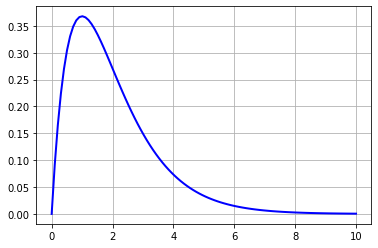

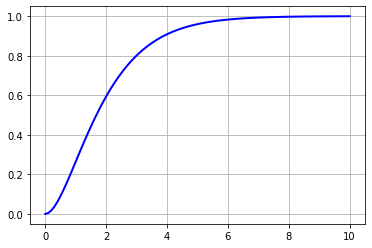

In [2]:
#ДЛЯ СЛУЧАЯ, КОГДА ИЗВЕСТНА ПЕРЕДАТОЧНАЯ ФУНКЦИЯ
p = syp.symbols('p')
t = syp.symbols('t',real = True)
w = sym.Symbol("w", real=True)
expression = 1/((p**2)+2*p+1)
w_wes = inverse_laplace_transform(expression, p, t)
w_wes
h_per=inverse_laplace_transform(expression/p, p, t)
g=lambdify(t, w_wes, 'numpy')
h=lambdify(t, h_per, 'numpy')
W=lambdify(p,expression, 'numpy')
t=linspace(0,10,100)
plt.plot(t,g(t), color='b', linewidth=2)
plt.grid(True)
plt.show()
plt.plot(t,h(t), color='b', linewidth=2)
plt.grid(True)
plt.show()


In [3]:
h_per

(-t + exp(t) - 1)*exp(-t)*Heaviside(t)

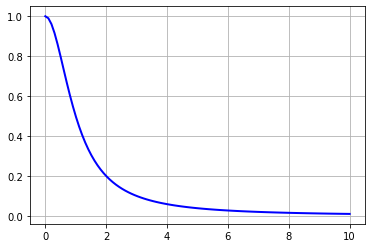

1/Abs((-w**2 + 2*I*w + 1)**1.0)

In [4]:
a = sym.Abs(W(w*sym.I).expand())
A = lambdify(w, a, 'numpy')
omega = linspace(0,10,100)
plt.plot(omega, A(omega), color = 'b', linewidth=2)
plt.grid(True)
plt.show()
a

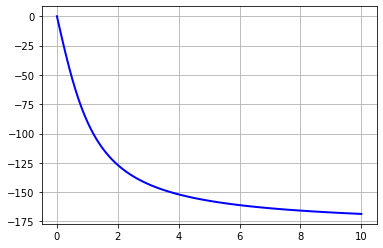

arg((-w**2 + 2*I*w + 1)**(-1.0))

In [5]:
phi = sym.arg(W(w*sym.I).expand())
Ph = lambdify(w, phi, 'numpy')
plt.plot(omega, Ph(omega)*(180/pi), color = 'b', linewidth=2)
plt.grid(True)
plt.show()
phi

In [6]:
#ДЛЯ СЛУЧАЯ, КОГДА ИЗВЕСТНА ВЕСОВАЯ ФУНКЦИЯ
p = syp.symbols('p')
t = syp.symbols('t',real = True)
w = sym.Symbol("w", real=True)
ves = 2*t**2*exp(-2*t)
ves

2*t**2*exp(-2*t)

In [7]:
W_p=laplace_transform(ves, t, p, noconds=True)
W_p

4/(p + 2)**3

In [8]:
h_per2 = inverse_laplace_transform(W_p/p, p, t)
h_per2

(-2*t**2 - 2*t + exp(2*t) - 1)*exp(-2*t)*Heaviside(t)/2

In [9]:
g2=lambdify(t, ves, 'numpy')
h2=lambdify(t, h_per2, 'numpy')
W2=lambdify(p,W_p, 'numpy')


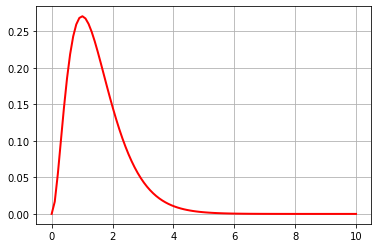

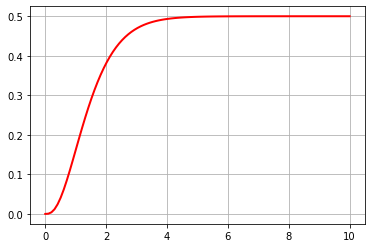

In [10]:
t=linspace(0,10,100)
plt.plot(t,g2(t), color='r', linewidth=2)
plt.grid(True)
plt.show()
plt.plot(t,h2(t), color='r', linewidth=2)
plt.grid(True)
plt.show()

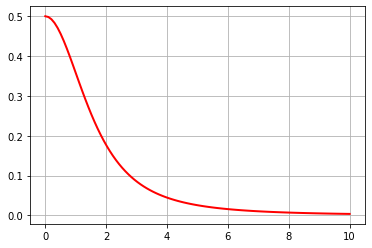

4/sqrt(w**6 + 12*w**4 + 48*w**2 + 64)

In [11]:
a2 = sym.Abs(W2(w*sym.I).expand())
A2 = lambdify(w, a2, 'numpy')
omega = linspace(0,10,100)
plt.plot(omega, A2(omega), color = 'r', linewidth=2)
plt.grid(True)
plt.show()
a2

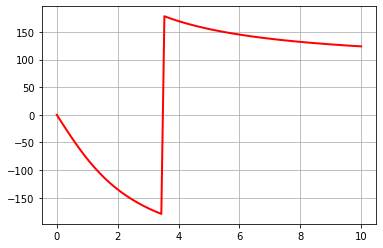

arg(1/(-I*w**3 - 6*w**2 + 12*I*w + 8))

In [12]:
phi2 = sym.arg(W2(w*sym.I).expand())
Ph2 = lambdify(w, phi2, 'numpy')
plt.plot(omega, Ph2(omega)*(180/pi), color = 'r', linewidth=2)
plt.grid(True)
plt.show()
phi2

In [13]:
#ДЛЯ СЛУЧАЯ, КОГДА ИЗВЕСТНА ПЕРЕХОДНАЯ ХАРАКТЕРИСТИКА
p = syp.symbols('p')
t = syp.symbols('t',real = True)
w = sym.Symbol("w", real=True)
h_perehod=10*(1-exp(-t))*Heaviside(1)
h_perehod

10 - 10*exp(-t)

In [14]:
w_p2=laplace_transform(h_perehod, t, p, noconds=True)
w_p3=w_p2*p
w_p3

10/(p + 1)

In [15]:
ves2 = inverse_laplace_transform(w_p3, p, t)
ves2

10*exp(-t)*Heaviside(t)

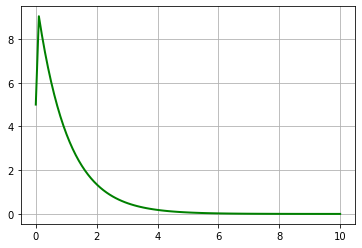

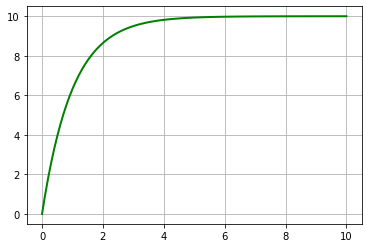

In [16]:
g3=lambdify(t, ves2, 'numpy')
h3=lambdify(t, h_perehod, 'numpy')
W3=lambdify(p,w_p3, 'numpy')
t=linspace(0,10,100)
plt.plot(t,g3(t), color='g', linewidth=2)
plt.grid(True)
plt.show()
plt.plot(t,h3(t), color='g', linewidth=2)
plt.grid(True)
plt.show()

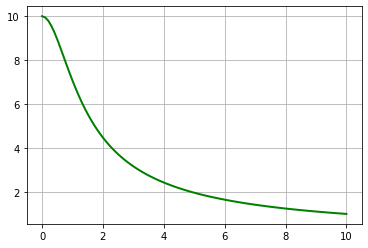

10/sqrt(w**2 + 1)

In [17]:
a3 = sym.Abs(W3(w*sym.I).expand())
A3 = lambdify(w, a3, 'numpy')
omega = linspace(0,10,100)
plt.plot(omega, A3(omega), color = 'g', linewidth=2)
plt.grid(True)
plt.show()
a3

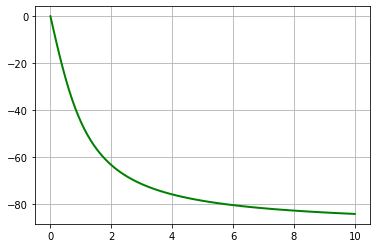

arg(1/(I*w + 1))

In [18]:
phi3 = sym.arg(W3(w*sym.I).expand())
Ph3 = lambdify(w, phi3, 'numpy')
plt.plot(omega, Ph3(omega)*(180/pi), color = 'g', linewidth=2)
plt.grid(True)
plt.show()
phi3